In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import random

# BMI를 계산해서 레이블을 리턴하는 함수
# thin 1, normal 2, fat 3
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "1"
    if bmi < 25: return "2"
    return "3"

In [3]:
# 출력 파일 준비하기
fp = open("c:/data/bmi/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\n")

# 무작위로 데이터 생성하기
cnt = {"1":0, "2":0, "3":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f"{h}, {w}, {label}\n")

fp.close()
print(cnt, "건의 데이터가 생성되었습니다.")

{'1': 6424, '2': 5815, '3': 7761} 건의 데이터가 생성되었습니다.


In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 로딩
df = pd.read_csv("c:/data/bmi/bmi.csv")
df.head()

,height,weight,label
0,155,55,2
1,155,35,1
2,166,50,1
3,198,38,1
4,189,62,1


In [5]:
train_cols = df.columns[0:2] # 0,1 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df['label']
print(df[train_cols].head())
print(y.head())

Index(['height', 'weight'], dtype='object')
   height  weight
0     155      55
1     155      35
2     166      50
3     198      38
4     189      62
0    2
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [6]:
df.columns

Index(['height', 'weight', 'label'], dtype='object')

In [7]:
df.shape

(20000, 3)

In [8]:
df.describe()

,height,weight,label
count,20000.000000,20000.000000,20000.000000
mean,160.032700,57.518500,2.066850
std,23.350574,13.225479,0.839533
min,120.000000,35.000000,1.000000
25%,140.000000,46.000000,1.000000
50%,160.000000,58.000000,2.000000
75%,180.000000,69.000000,3.000000
max,200.000000,80.000000,3.000000


In [9]:
# 분류를 기준으로 한 평균값들
df.groupby("label").mean()

,height,weight
label,,
1,179.919832,47.362547
2,164.486844,58.657094
3,140.234248,65.071769


In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '빈도')

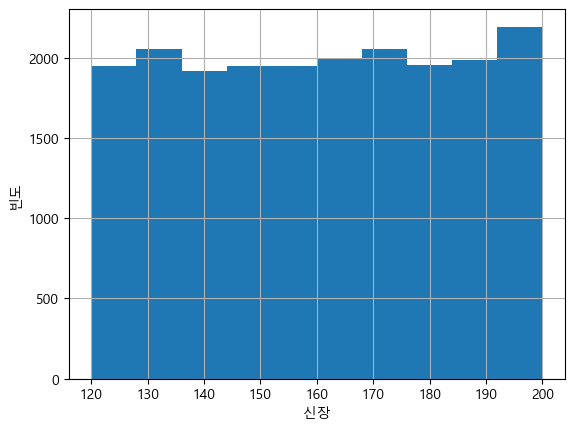

In [11]:
df["height"].hist()
plt.xlabel('신장')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

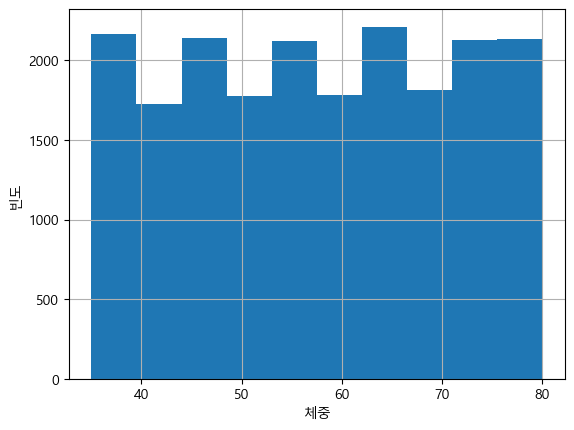

In [12]:
df["weight"].hist()
plt.xlabel('체중')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

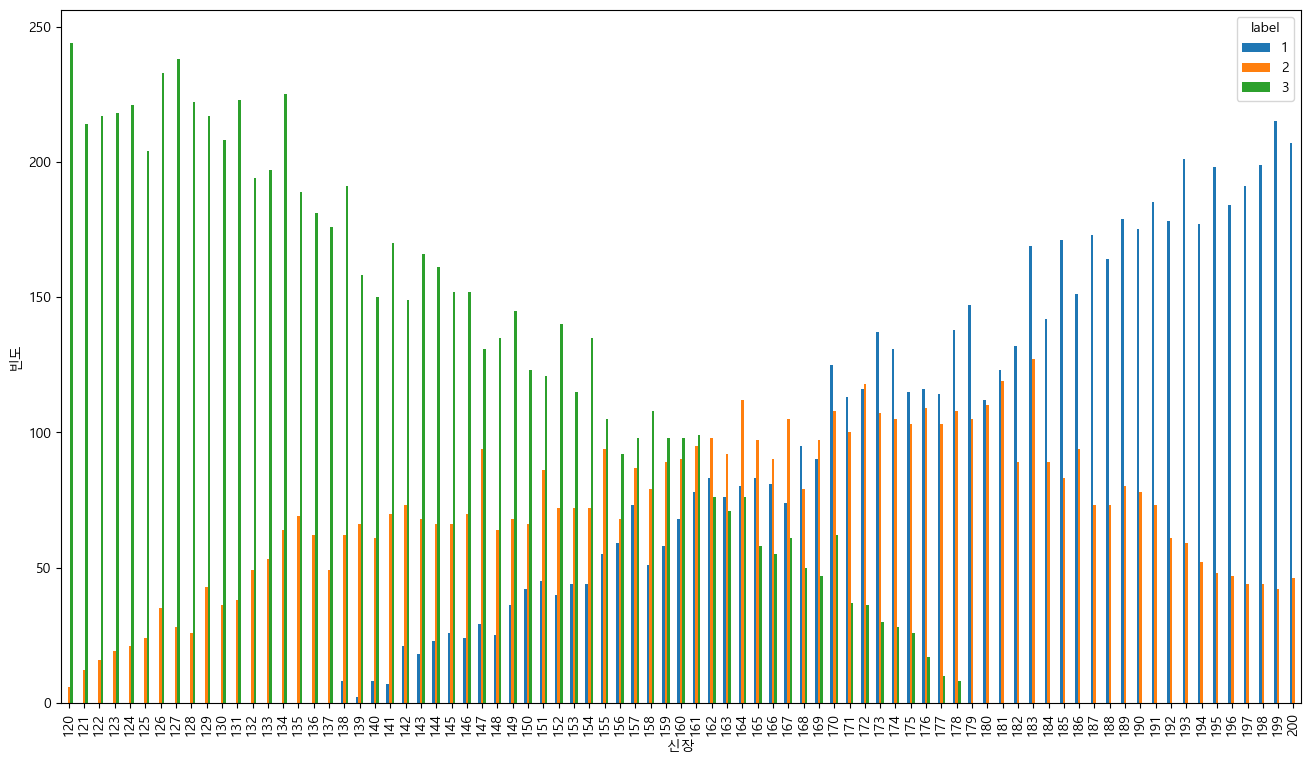

In [13]:
plt.rcParams["figure.figsize"]=(16,9)
# crosstab(x,y) 교차분석표
pd.crosstab(df["height"],df.label).plot(kind='bar')
plt.xlabel('신장')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

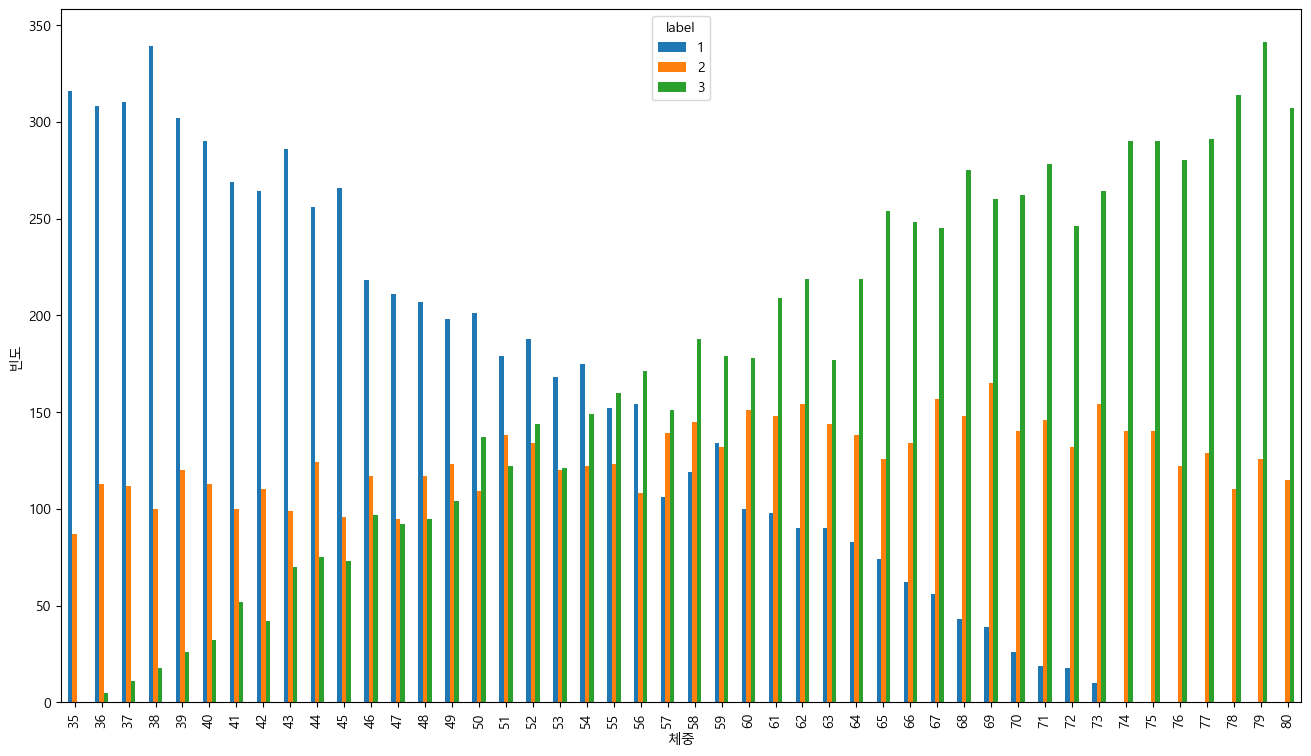

In [14]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["weight"],df.label).plot(kind='bar')
plt.xlabel('체중')
plt.ylabel('빈도')

In [15]:
df["label"].value_counts()

3    7761
1    6424
2    5815
Name: label, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

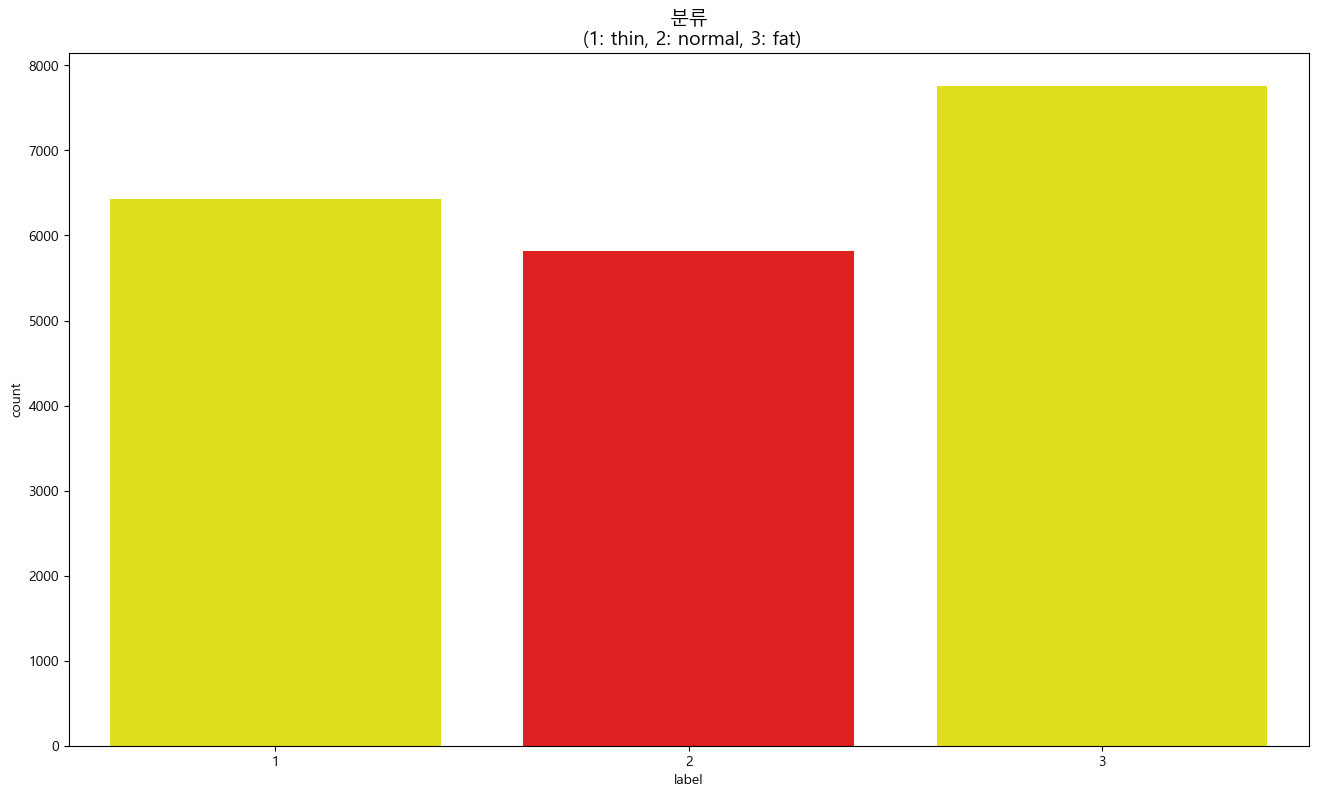

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors = ["yellow", "red"]
sns.countplot('label', data=df, palette=colors)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [17]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['label'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2['label'].value_counts()

1    5815
2    5815
3    5815
Name: label, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

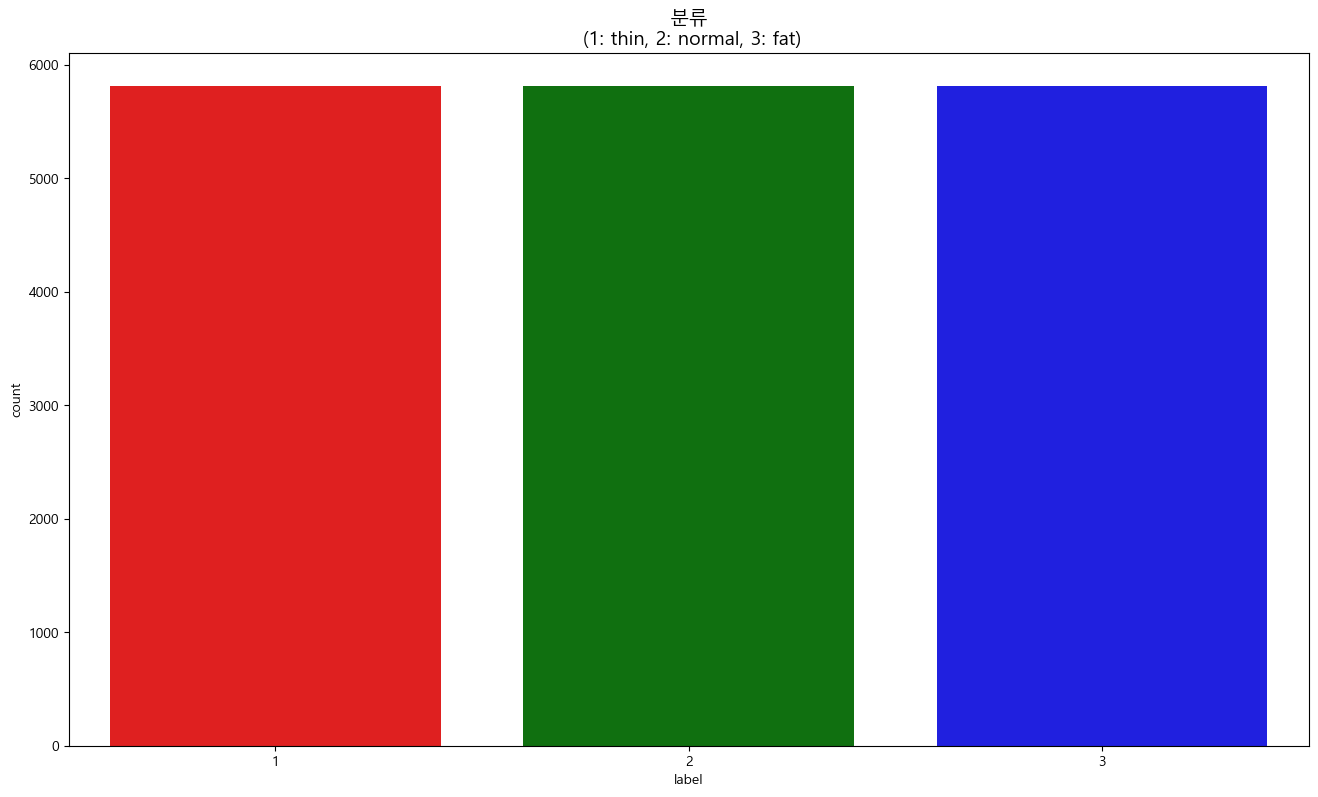

In [18]:
colors = ["red","green","blue"]
sns.countplot('label', data=df2, palette=colors)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [19]:
train_cols = ['height', 'weight']
X = X_samp[train_cols] # 독립변수
y = y_samp["label"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9817282889079966
검증용: 0.9819432502149613


In [21]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[1140,   23,    0],
       [  19, 1136,    8],
       [   0,   13, 1150]], dtype=int64)

In [22]:
df_cm=pd.DataFrame(cm, index=[1,2,3], columns=[1,2,3])
df_cm

,1,2,3
1,1140,23,0
2,19,1136,8
3,0,13,1150


<AxesSubplot:title={'center':'Confusion Matrix'}>

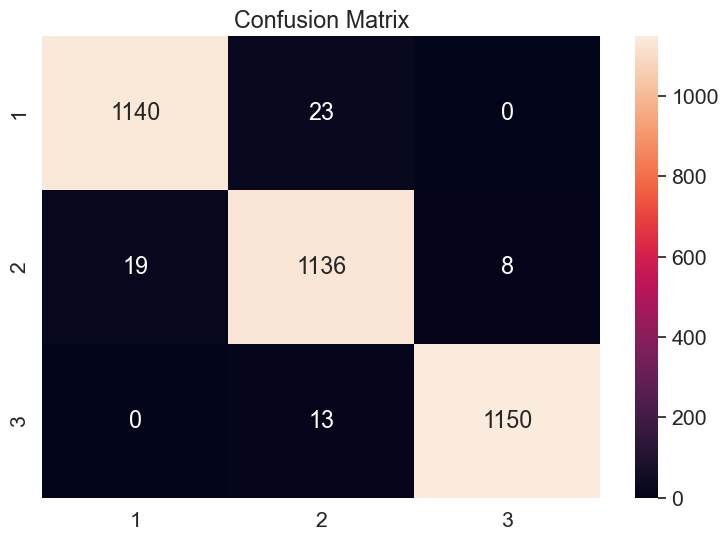

In [23]:
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True,fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자